In [44]:
import re
import pandas as pd
import altair as alt 
from collections import defaultdict
from nltk.corpus import stopwords
alt.data_transformers.enable('json')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [45]:
edi_text = open("/Users/serena/Desktop/five_months_in_edinburgh_raw.txt").read()

In [62]:
edi_text = edi_text.replace("\n\n", " ")
edi_words = edi_text.split(" ")

count = 0
for word in edi_words:
    if "-" in word: 
        count += 1
#         small_count = 0
#         for letter in word:
#             if letter == "-":
#                 count += 1
#                 if small_count == 2:
#                     count += 1
#                 if small_count == 3:
#                     count += 2
    elif word == "—" or word == "":
        count += 0
    elif word.endswith("."):
        count += 1
    else:
        count += 1
print(count) # goal: 299562

299550


In [55]:
edi_prop_nouns = defaultdict(int)

for word in edi_words:
    if word != "":
        if word[0].isupper() and len(word) > 2:
            prop_n = word.strip('!”"#$%’.&\'()*+,-./:;<=>?@[\\]^_`{|}~')
            if prop_n.endswith("’s"):
                prop_n = prop_n[:-2]
            edi_prop_nouns[prop_n] += 1
            
for word, freq in sorted(edi_prop_nouns.items(), key=lambda item: item[1], reverse=True):
    print("%s: %s" % (word, freq))
    if freq < 50:
        break

The: 768
Nick: 510
Edinburgh: 395
Stephanie: 381
Tonje: 260
English: 257
French: 236
Noah: 230
New: 228
Arthur: 222
Chinese: 211
London: 199
Ian: 196
Place: 187
Finally: 175
Daniel: 160
I’d: 152
Weijia: 150
After: 146
Street: 141
Shanghai: 135
She: 135
UBC: 133
Alyssa: 132
Vancouver: 122
There: 119
German: 114
Bridge: 104
Haile: 104
Unfortunately: 97
Norwegian: 95
Italian: 91
Canada: 89
Scotland: 88
Europe: 88
University: 87
Kristen: 87
Karis: 84
Mandarin: 83
American: 83
Princes: 81
Tower: 80
Then: 78
Prague: 77
Berlin: 74
Scottish: 71
Soon: 69
York: 68
China: 65
Italy: 64
Afterwards: 63
Florence: 63
Aayush: 63
British: 62
Betsy: 62
Glasgow: 59
Sid: 58
Copenhagen: 58
Yash: 57
They: 56
Castle: 56
Museum: 56
Royal: 56
Luckily: 55
One: 55
Seat: 55
Maggy: 55
Oxford: 54
North: 53
Asian: 53
Our: 51
Teviot: 50
Danish: 50
Amsterdam: 49


In [223]:
swords = set(stopwords.words('english'))

edi_all_nouns = defaultdict(int)

for word in edi_words:
    if word != "" and word not in swords:
        noun = word.strip('!”"#$%’.&\'()*+,-./:;<=>?@[\\]^_`{|}~')
        if noun.endswith("’s"):
            noun = noun[:-2]
        edi_all_nouns[noun.lower()] += 1
            
for word, freq in sorted(edi_all_nouns.items(), key=lambda item: item[1], reverse=True):
    if freq > 50 and freq < 150:
        print("%s: %s" % (word, freq))

come: 149
felt: 149
finished: 149
taking: 148
buildings: 147
floor: 147
far: 147
past: 147
simply: 147
something: 146
rather: 145
year: 144
always: 144
went: 143
second: 142
classes: 141
music: 139
learned: 138
managed: 138
earlier: 138
needed: 138
them: 138
table: 138
places: 138
chocolate: 138
returned: 137
store: 137
out: 136
alyssa: 136
shanghai: 135
less: 135
hours: 134
park: 134
ubc: 133
days: 133
train: 133
lunch: 132
sky: 132
a: 131
tomorrow: 131
tower: 131
travel: 130
make: 129
direction: 129
stories: 128
friend: 127
turned: 127
plans: 126
topic: 125
afterwards: 124
instead: 124
visited: 124
leave: 124
glad: 124
area: 124
items: 123
streets: 123
trip: 122
vancouver: 122
ago: 122
weather: 122
bright: 122
began: 122
continued: 122
used: 121
castle: 121
world: 120
couldn’t: 120
stop: 120
talking: 120
late: 120
mentioned: 120
unfortunately: 119
breakfast: 119
week: 119
looking: 119
full: 118
least: 118
final: 117
art: 117
weren’t: 116
yesterday: 116
books: 115
surprised: 115
famil

In [58]:
edi_dates = r"(January|February|March|April|May|June) [0-9][0-9]? "

dates = []
for match in re.finditer(edi_dates, edi_text):
    dates.append(match.group())
    
print(dates)

['January 10 ', 'January 11 ', 'January 12 ', 'January 13 ', 'January 14 ', 'January 15 ', 'January 16 ', 'January 17 ', 'January 18 ', 'January 19 ', 'January 20 ', 'January 21 ', 'January 22 ', 'January 23 ', 'January 24 ', 'January 26 ', 'January 27 ', 'January 28 ', 'January 29 ', 'January 30 ', 'January 31 ', 'February 1 ', 'February 2 ', 'February 3 ', 'February 4 ', 'February 5 ', 'February 6 ', 'February 7 ', 'February 8 ', 'February 9 ', 'February 10 ', 'February 25 ', 'February 11 ', 'February 12 ', 'February 13 ', 'February 14 ', 'February 15 ', 'February 16 ', 'February 17 ', 'February 18 ', 'February 19 ', 'February 20 ', 'February 21 ', 'February 22 ', 'February 23 ', 'February 24 ', 'February 25 ', 'February 26 ', 'February 27 ', 'February 28 ', 'March 1 ', 'March 2 ', 'March 3 ', 'March 4 ', 'March 5 ', 'March 6 ', 'March 7 ', 'March 8 ', 'March 9 ', 'March 10 ', 'March 11 ', 'March 12 ', 'March 13 ', 'March 14 ', 'March 15 ', 'March 16 ', 'March 17 ', 'March 18 ', 'Mar

In [64]:
def count_words(entry):
    words = entry.replace("\n\n", " ")
    words = words.split(" ")

    count = 0
    for word in words:
        if "-" in word: 
            count += 1
        elif word == "—" or word == "":
            count += 0
        elif word.endswith("."):
            count += 1
        else:
            count += 1
    return count

In [65]:
count_words(edi_text)

299550

In [87]:
e_entries = re.split(edi_dates, edi_text)

emonths = []
edays = []
ecounts = []

e = 0
for i in range(len(e_entries)):
    if i != 0 and i%2 == 0:
        month = dates[e].split(" ")[0]
        emonths.append(month)
        day = dates[e].split(" ")[1]
        edays.append(day)
        ecounts.append(count_words(e_entries[i]))
        e += 1
        
print(emonths[:20])
print(edays[:20])
print(ecounts[:20])

['January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January', 'January']
['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '26', '27', '28', '29', '30']
[1057, 1271, 1776, 1998, 748, 1303, 1713, 2800, 2090, 2854, 2636, 3541, 3335, 2240, 1464, 3790, 2698, 3274, 1956, 1385]


In [92]:
ed_df = pd.DataFrame({'months': emonths, 'days': edays, 'counts': ecounts})
ed_df.head()

,months,days,counts
0,January,10,1057
1,January,11,1271
2,January,12,1776
3,January,13,1998
4,January,14,748


In [93]:
ed_df.iloc[120:124, 0:4]

,months,days,counts
120,May,14,3694
121,May,15,3581
122,May,16,838
123,May,17,7


In [94]:
ed_df.loc[30, 'counts'] = 1836
ed_df.loc[123, 'counts'] = 2358

ed_df = ed_df.drop([31, 124, 125])

ed_df = ed_df.reset_index()

ed_df = ed_df.drop('index', axis = 1)

ed_df.head()

,months,days,counts
0,January,10,1057
1,January,11,1271
2,January,12,1776
3,January,13,1998
4,January,14,748


In [95]:
ed_df['days'] = ed_df['days'].astype(int)

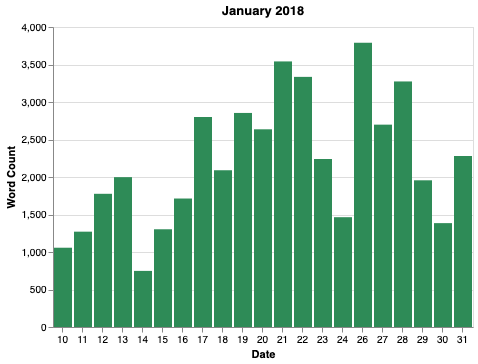

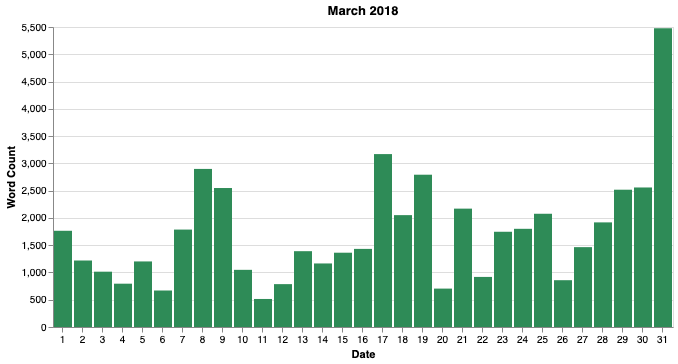

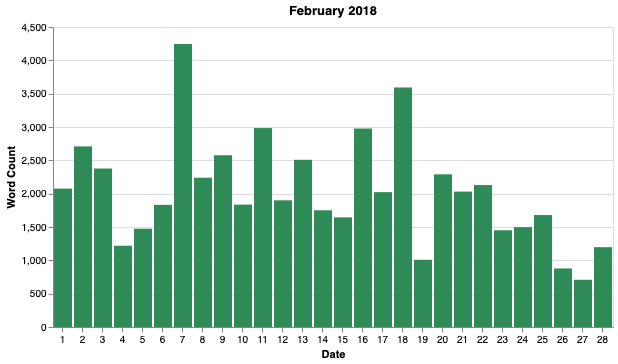

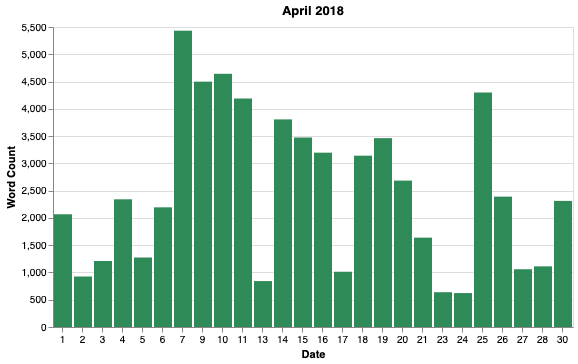

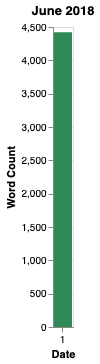

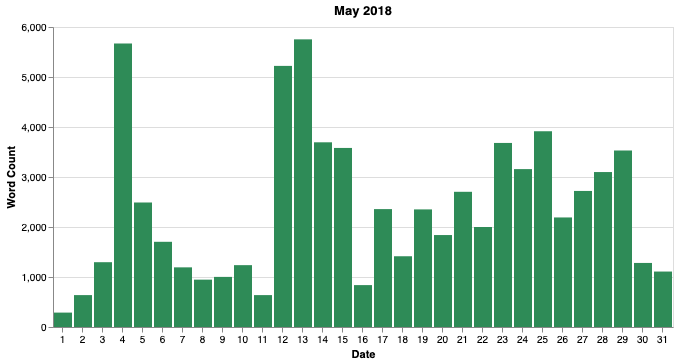

In [97]:
jan = ed_df.query('months == "January"')
feb = ed_df.query('months == "February"')
mar = ed_df.query('months == "March"')
apr = ed_df.query('months == "April"')
may = ed_df.query('months == "May"')
jun = ed_df.query('months == "June"')

months = [jan, feb, mar, apr, may, jun]

month_names = ['January', 'February', 'March', 'April', 'May', 'June']

for i in range(len(month_names)):
    
    chart = alt.Chart(months[i]).mark_bar(color = 'SeaGreen').encode(
    alt.X("days:O", title = "Date", axis = alt.Axis(labelAngle = 360)),
    alt.Y("counts", title = "Word Count")
    ).properties(title = month_names[i] + " 2018")
    
    chart.display()

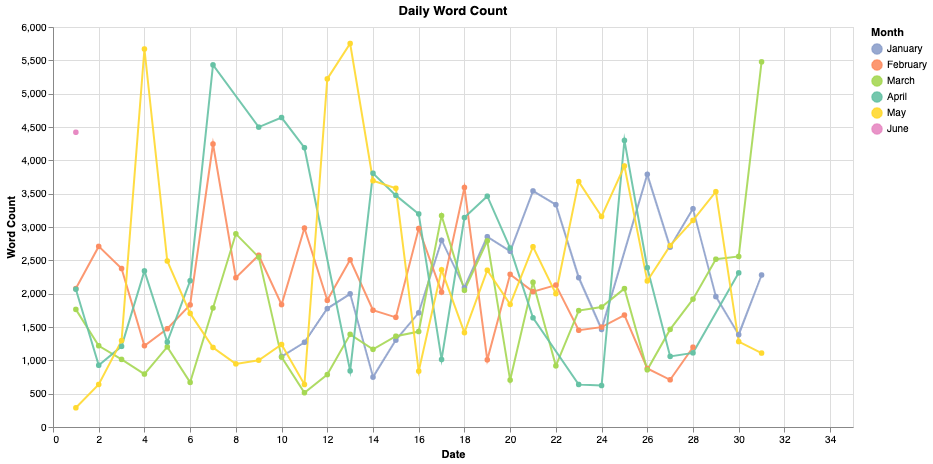

In [123]:
alt.Chart(ed_df).mark_line(point = True, opacity = 0.9).encode(
alt.X("days", title = "Date"),
alt.Y("counts", title = "Word Count"),
alt.Color("months", 
          legend = alt.Legend(title = "Month", values = ['January', 'February', 'March', 'April', 'May', 'June']), 
          scale = alt.Scale(scheme = 'set2'))
).properties(width = 800, height = 400, title = "Daily Word Count")

In [124]:
ed_df.describe()

,days,counts
count,138.000000,138.000000
mean,16.079710,2168.681159
std,8.668309,1188.152630
min,1.000000,288.000000
25%,9.000000,1223.500000
50%,16.000000,1999.000000
75%,23.000000,2774.250000
max,31.000000,5753.000000


In [125]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
months    138 non-null object
days      138 non-null int64
counts    138 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.3+ KB


In [126]:
ed_df.groupby('months').describe()

days                                                      counts  \
         count       mean       std   min    25%   50%    75%   max  count   
months                                                                       
April     26.0  15.153846  8.834896   1.0   7.50  15.5  22.50  30.0   26.0   
February  28.0  14.500000  8.225975   1.0   7.75  14.5  21.25  28.0   28.0   
January   21.0  20.285714  6.573757  10.0  15.00  20.0  26.00  31.0   21.0   
June       1.0   1.000000       NaN   1.0   1.00   1.0   1.00   1.0    1.0   
March     31.0  16.000000  9.092121   1.0   8.50  16.0  23.50  31.0   31.0   
May       31.0  16.000000  9.092121   1.0   8.50  16.0  23.50  31.0   31.0   

                                                                             
                 mean          std     min     25%     50%      75%     max  
months                                                                       
April     2479.269231  1420.736163   622.0  1136.5  2326.5  3471.00  5432.0  
February  2029.750000   798.811739   708.0  1492.0  1961.5  2409.75  4245.0  
January   2200.428571   860.802043   748.0  1464.0  2090.0  2800.00  3790.0  
June      4421.000000          NaN  4421.0  4421.0  4421.0  4421.00  4421.0  
March     1735.806452  1002.187022   514.0  1031.0  1464.0  2123.00  5477.0  
May       2372.387097  1477.881788   288.0  1215.0  2191.0  3344.00  5753.0

In [266]:
people = ['Nick', 'Stephanie', 'Noah', 'Ian', 'Yash', 'Tonje', 'Weijia', 'Haile', 'Daniel', 'Alyssa', 'Kristen', 'Karis', 'Betsy', 'Sid', 'Maggy', 'Echo']

places = ['Edinburgh', 'Scotland', 'London', 'Shanghai', 'UBC', 'Vancouver', 'Canada', 'Scotland', 'Europe', 'Princes', 'Prague', 'Berlin', 'York', 'China', 'Italy', 'Florence', 'Glasgow', 'Copenhagen', 'Oxford', 'Teviot', 'Amsterdam', 'Milan', 'Dublin', 'Brussels', 'Appleton']

nationalities = ['English', 'French', 'Chinese', 'German', 'Norwegian', 'Italian', 'Mandarin', 'American', 'Scottish', 'British', 'Danish', 'Canadian', 'Dutch', 'Irish', 'Belgian']

themes = ['university', 'castle', 'museum', 'conversation', 'linguistics', 'language', 'park', 'train', 'nlp', 'restaurant', 'studying', 'airport', 'bridge', 'exam', 'snow', 'alcohol', 'conference', 'flight', 'gardens', 'chocolate', 'tower', 'bar', 'hostel', 'market', 'river', 'lake', 'cathedral', 'library', 'movie', 'coffee', 'cafe']

print(len(people))
print(len(places))
print(len(nationalities))
print(len(themes))

16
25
15
31


In [136]:
def count_word(target_word, target_entry):
    count = 0
    for word in target_entry:
        word = word.strip('!”"#$%’.&\'()*+,-./:;<=>?@[\\]^_`{|}~')
        if word.endswith("’s"):
            word = word[:-2]
        if word.lower() == target_word:
            count += 1
    return count

In [270]:
count_word("happy", edi_words)

94

In [263]:
words = set()
for word in edi_words:
    if word.endswith("land"):
        words.add(word)
print(words)

{'Maryland', 'farmland', 'mainland', 'England', 'dreamland', 'highland', 'Wonderland', 'Highland', 'Switzerland', 'Island', 'Holland', 'island', 'Portland', 'Ireland', 'land', 'Scotland', 'furthest-inland', 'Iceland', 'woodland'}


In [271]:
def find_category(target_word2):
    if target_word2 in people:
        return "People", target_word2
    if target_word2 in places:
        return "Places", target_word2
    if target_word2 in nationalities:
        return "Nationalities", target_word2
    if target_word2.lower() in themes:
        return "Themes", target_word2.lower()

In [272]:
e_entries = re.split(edi_dates, edi_text)

eobs = []

e = 0
for i in range(len(e_entries)):
    if i != 0 and i%2 == 0:
        month = dates[e].split(" ")[0]
        day = dates[e].split(" ")[1]
        e += 1
        e_ent = e_entries[i]
        words = e_ent.split(" ")
        for word in words:
            word = word.strip('!”"#$%’.&\'()*+,-./:;<=>?@[\\]^_`{|}~')
            if word.endswith("’s"):
                word = word[:-2]
            cat = find_category(word)
            if cat is not None:
                eobs.append({'month': month, 'day': day, 'word': cat[1], 'category': cat[0]})
        
print(eobs[:10])

[{'month': 'January', 'day': '10', 'word': 'flight', 'category': 'Themes'}, {'month': 'January', 'day': '10', 'word': 'Shanghai', 'category': 'Places'}, {'month': 'January', 'day': '10', 'word': 'Amsterdam', 'category': 'Places'}, {'month': 'January', 'day': '10', 'word': 'conversation', 'category': 'Themes'}, {'month': 'January', 'day': '10', 'word': 'Amsterdam', 'category': 'Places'}, {'month': 'January', 'day': '10', 'word': 'Mandarin', 'category': 'Nationalities'}, {'month': 'January', 'day': '10', 'word': 'Dutch', 'category': 'Nationalities'}, {'month': 'January', 'day': '10', 'word': 'Amsterdam', 'category': 'Places'}, {'month': 'January', 'day': '10', 'word': 'flight', 'category': 'Themes'}, {'month': 'January', 'day': '10', 'word': 'flight', 'category': 'Themes'}]


In [273]:
pn_df = pd.DataFrame(eobs, columns = ['month', 'day', 'word', 'category'])
pn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 4 columns):
month       9691 non-null object
day         9691 non-null object
word        9691 non-null object
category    9691 non-null object
dtypes: object(4)
memory usage: 302.9+ KB


In [274]:
pn_df.head()

,month,day,word,category
0,January,10,flight,Themes
1,January,10,Shanghai,Places
2,January,10,Amsterdam,Places
3,January,10,conversation,Themes
4,January,10,Amsterdam,Places


In [275]:
pn_counts = pn_df.groupby(pn_df.columns.tolist()).size().reset_index().rename(columns = {0: 'counts'})
pn_counts.head()

,month,day,word,category,counts
0,April,1,Betsy,People,2
1,April,1,Edinburgh,Places,3
2,April,1,Glasgow,Places,1
3,April,1,Nick,People,19
4,April,1,Noah,People,10


In [276]:
pn_counts['day'] = pn_counts['day'].astype(int)

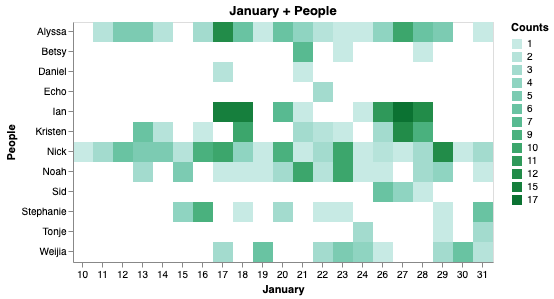

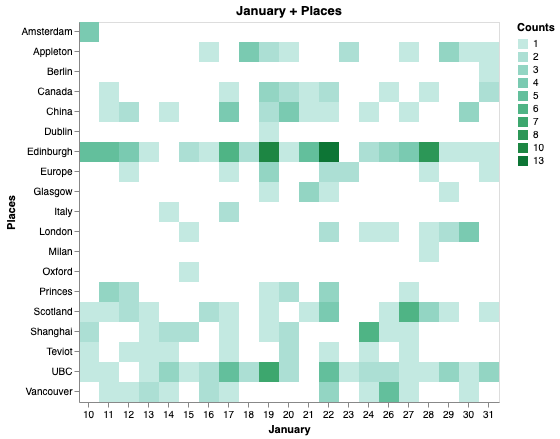

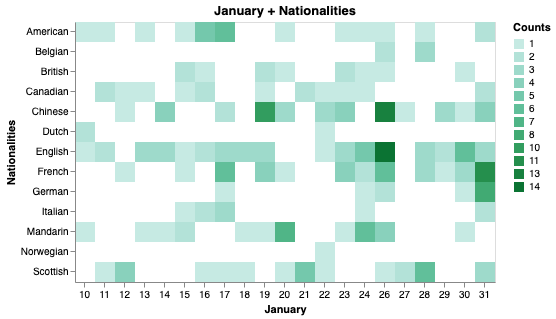

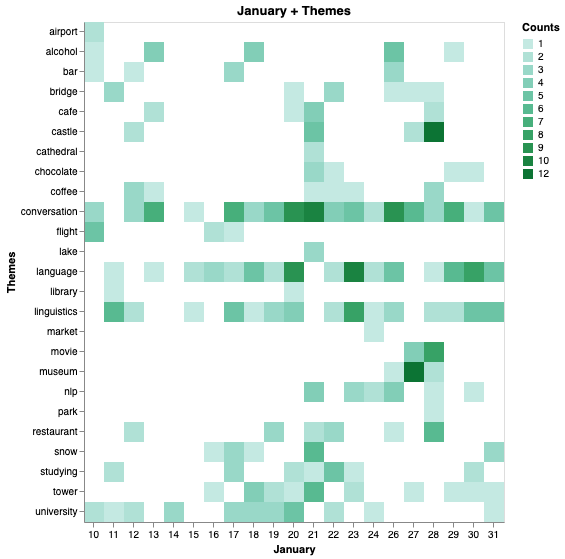

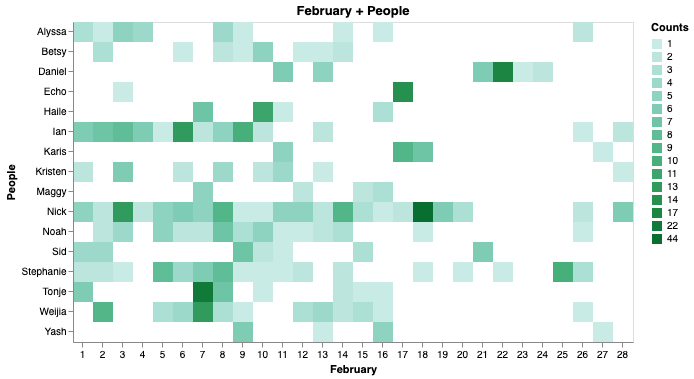

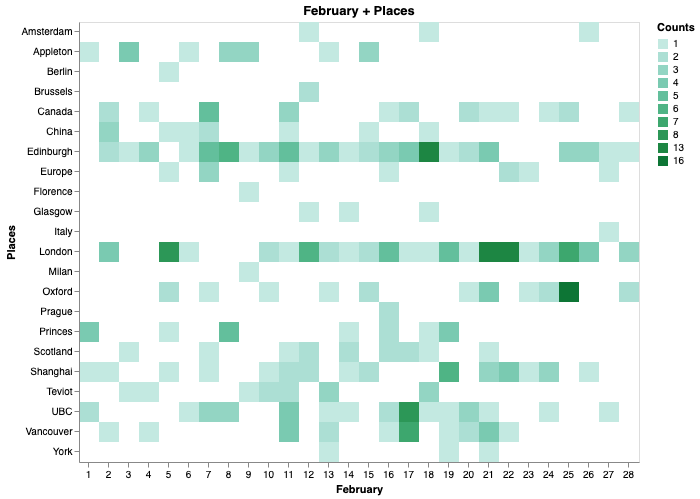

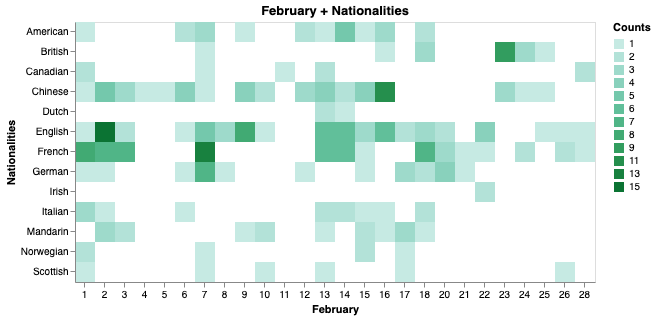

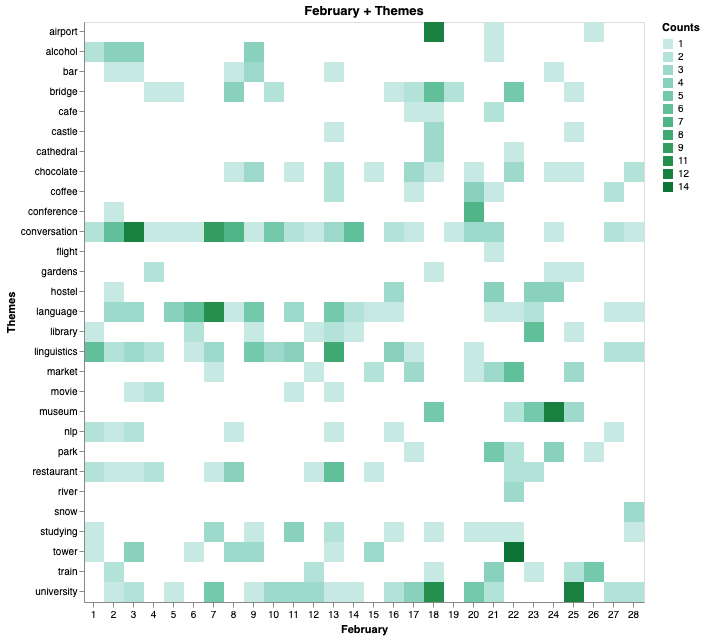

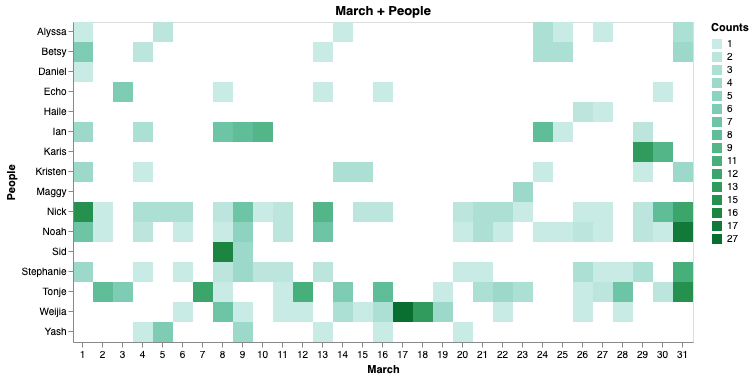

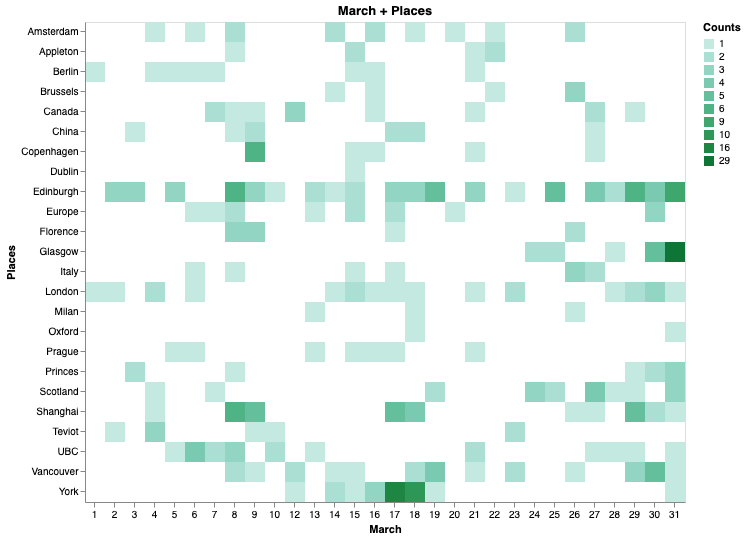

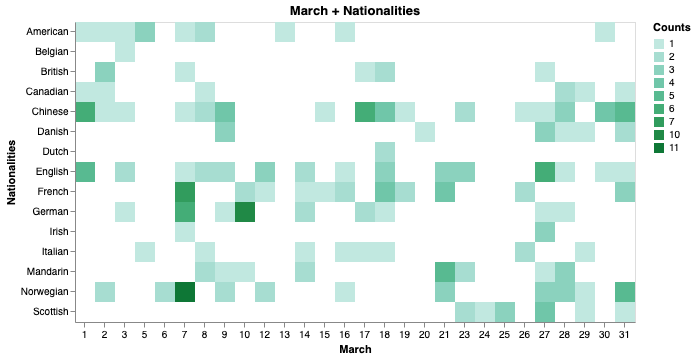

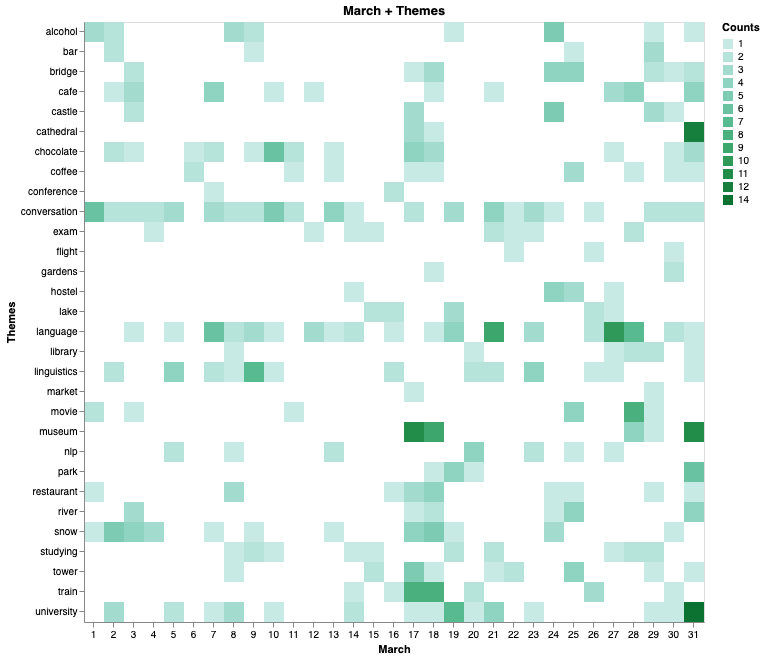

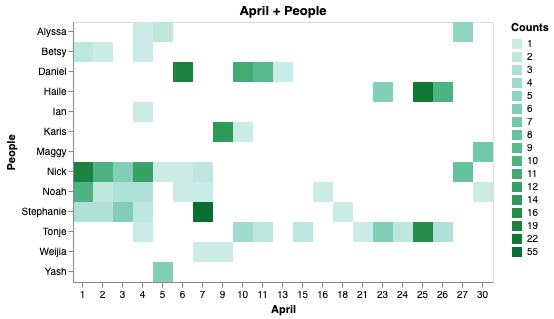

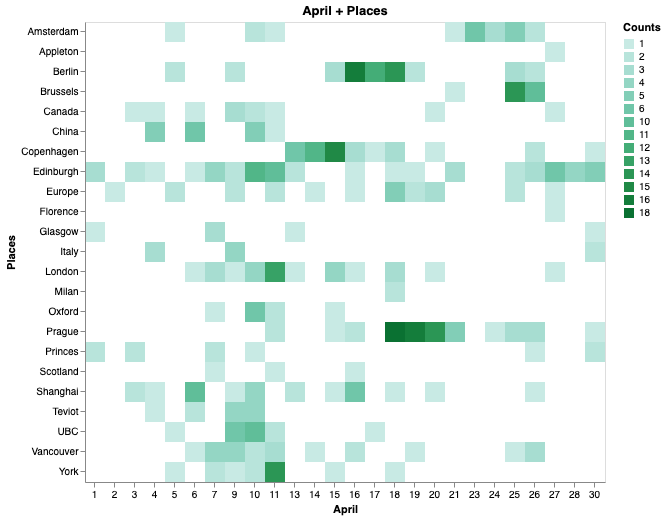

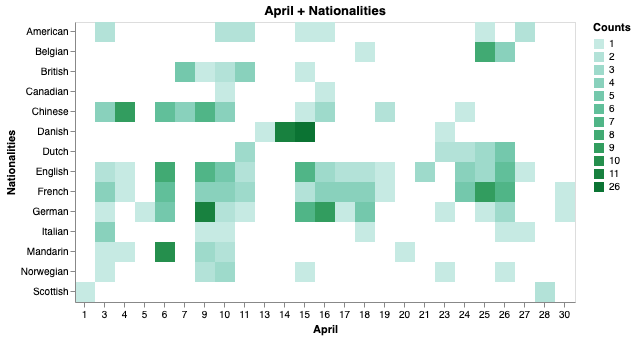

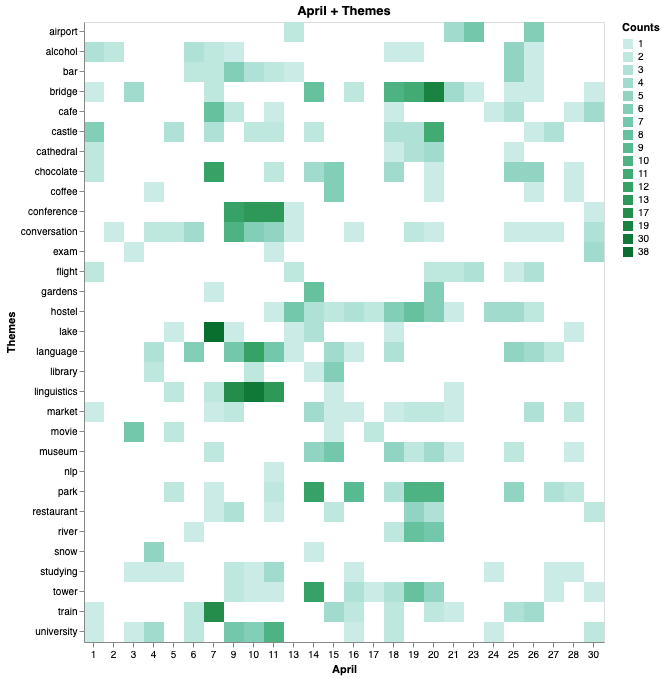

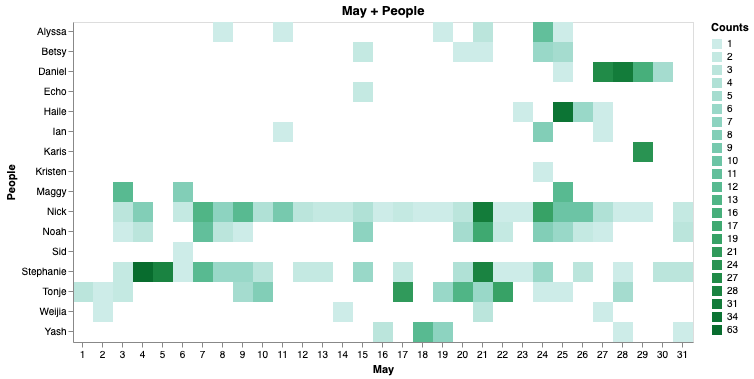

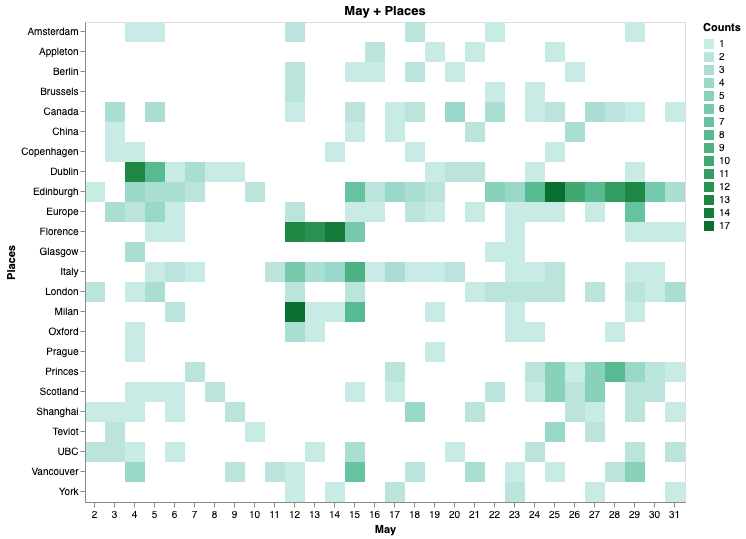

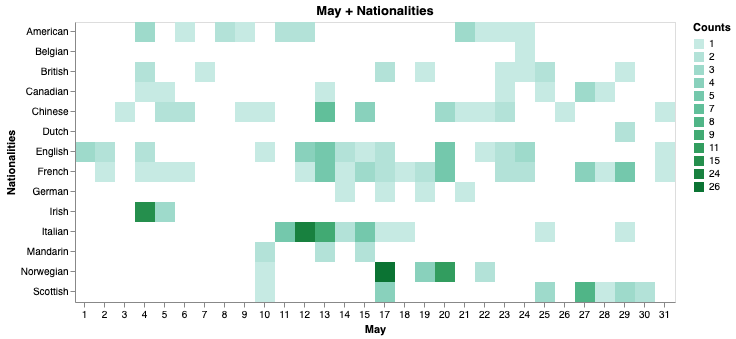

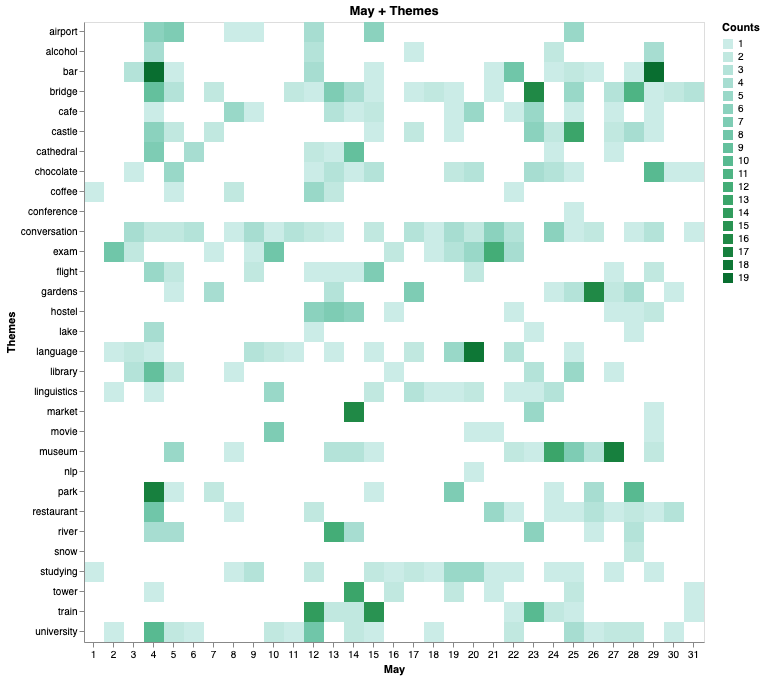

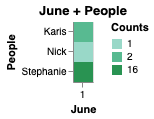

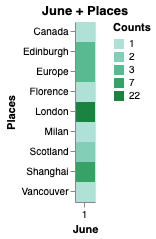

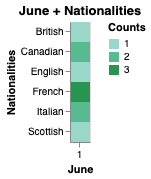

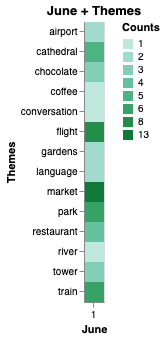

In [277]:
for month in ['January', 'February', 'March', 'April', 'May', 'June']:
    for category in ['People', 'Places', 'Nationalities', 'Themes']:
        query_string = 'month == "' + month + '" & category == "' + category + '\"'
        month_cat_query = pn_counts.query(query_string)
        
        heatmap = alt.Chart(month_cat_query).mark_rect().encode(
            alt.X("day:O", title = month, axis=alt.Axis(labelAngle=360)),
            alt.Y("word", title = category),
            color = alt.Color("counts:O", scale = alt.Scale(scheme = 'bluegreen'), title = "Counts")
        ).properties(title = month + " + " + category)
        
        heatmap.display()

In [278]:
ed_df['approx'] = ed_df['counts']//50*50

In [279]:
ed_df.head()

,months,days,counts,approx
0,January,10,1057,1050
1,January,11,1271,1250
2,January,12,1776,1750
3,January,13,1998,1950
4,January,14,748,700


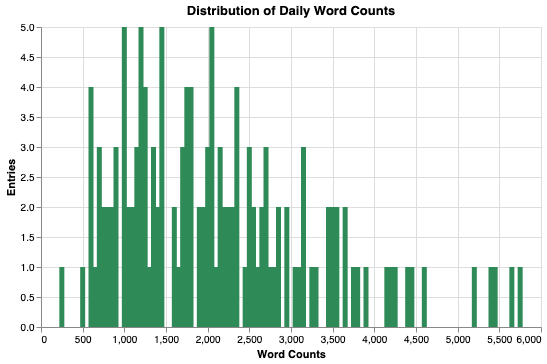

In [280]:
alt.Chart(ed_df).mark_bar(color = "SeaGreen").encode(
    alt.X('approx', title = "Word Counts"),
    alt.Y('count()', title = "Entries"),
).properties(width = 500, height = 300, title = "Distribution of Daily Word Counts")

In [281]:
ed_df['day'] = "blank"
ed_df.head()

for i in range(len(ed_df)):
    if i == 0 or i%7 == 0:
        ed_df.loc[i, 'day'] = 'Wednesday'
    if i%7 == 1:
        ed_df.loc[i, 'day'] = 'Thursday'
    if i%7 == 2:
        ed_df.loc[i, 'day'] = 'Friday'
    if i%7 == 3:
        ed_df.loc[i, 'day'] = 'Saturday'
    if i%7 == 4:
        ed_df.loc[i, 'day'] = 'Sunday'
    if i%7 == 5:
        ed_df.loc[i, 'day'] = 'Monday'
    if i%7 == 6:
        ed_df.loc[i, 'day'] = 'Tuesday'

In [282]:
ed_df.head()

,months,days,counts,approx,day
0,January,10,1057,1050,Wednesday
1,January,11,1271,1250,Thursday
2,January,12,1776,1750,Friday
3,January,13,1998,1950,Saturday
4,January,14,748,700,Sunday


In [283]:
weekday_stats = ed_df.groupby('day').describe()
weekday_stats

days                                                     counts  \
          count       mean       std  min    25%   50%    75%   max  count   
day                                                                          
Friday     20.0  16.200000  9.018110  2.0   9.75  16.5  24.00  31.0   20.0   
Monday     19.0  16.894737  8.432047  3.0  11.50  19.0  24.00  30.0   19.0   
Saturday   20.0  15.700000  8.962495  1.0   9.75  17.0  24.25  31.0   20.0   
Sunday     20.0  15.150000  8.857200  1.0   8.75  16.0  22.00  29.0   20.0   
Thursday   20.0  15.200000  9.018110  1.0   8.75  15.5  23.00  30.0   20.0   
Tuesday    19.0  17.947368  8.396254  4.0  13.00  20.0  25.00  31.0   19.0   
Wednesday  20.0  15.600000  8.940741  1.0   8.00  15.0  22.00  30.0   20.0   

                        ...                 approx                            \
                  mean  ...     75%     max  count         mean          std   
day                     ...                                                    
Friday     2213.050000  ...  2933.0  5477.0   20.0  2185.000000  1428.663343   
Monday     2092.789474  ...  2499.0  5222.0   19.0  2071.052632  1239.210747   
Saturday   2192.650000  ...  3027.5  4498.0   20.0  2165.000000  1142.262298   
Sunday     2215.050000  ...  3241.0  5670.0   20.0  2190.000000  1526.226858   
Thursday   2150.950000  ...  2776.0  3790.0   20.0  2122.500000  1025.397869   
Tuesday    2183.789474  ...  2310.5  5753.0   19.0  2157.894737  1145.190809   
Wednesday  2129.450000  ...  2728.0  3806.0   20.0  2105.000000   845.872331   

                                                  
             min     25%     50%     75%     max  
day                                               
Friday     600.0  1000.0  1800.0  2925.0  5450.0  
Monday     650.0  1250.0  1800.0  2475.0  5200.0  
Saturday   500.0  1200.0  2050.0  3000.0  4450.0  
Sunday     600.0   887.5  1675.0  3200.0  5650.0  
Thursday   250.0  1362.5  2100.0  2762.5  3750.0  
Tuesday    800.0  1700.0  1900.0  2275.0  5750.0  
Wednesday  900.0  1425.0  2075.0  2725.0  3800.0  

[7 rows x 24 columns]

In [284]:
weekday_stats2 = weekday_stats['counts']
weekday_stats2

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,20.0,2213.050000,1429.194012,622.0,1039.50,1818.0,2933.0,5477.0
Monday,19.0,2092.789474,1243.950052,669.0,1256.50,1832.0,2499.0,5222.0
Saturday,20.0,2192.650000,1147.538981,514.0,1232.50,2059.0,3027.5,4498.0
Sunday,20.0,2215.050000,1528.210149,638.0,914.00,1687.0,3241.0,5670.0
Thursday,20.0,2150.950000,1024.249377,288.0,1391.75,2142.0,2776.0,3790.0
Tuesday,19.0,2183.789474,1143.460857,842.0,1708.50,1918.0,2310.5,5753.0
Wednesday,20.0,2129.450000,847.147565,918.0,1438.50,2102.5,2728.0,3806.0


In [285]:
weekly_avgs = pd.DataFrame({"day": ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
             "avg": [2215.050000, 2092.789474, 2183.789474, 2129.450000, 2150.950000, 2213.050000, 2192.650000],
                           "order": [0, 1, 2, 3, 4, 5, 6]})

weekly_avgs

,day,avg,order
0,Sunday,2215.050000,0
1,Monday,2092.789474,1
2,Tuesday,2183.789474,2
3,Wednesday,2129.450000,3
4,Thursday,2150.950000,4
5,Friday,2213.050000,5
6,Saturday,2192.650000,6


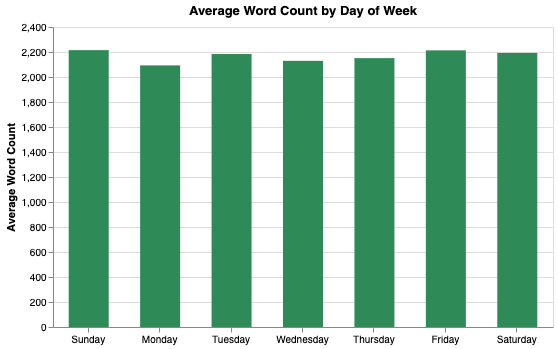

In [286]:

alt.Chart(weekly_avgs).mark_bar(width = 40, color = "SeaGreen").encode(
alt.X('day:N', title = None, axis = alt.Axis(labelAngle = 360), sort = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']),
alt.Y('avg', title = "Average Word Count")
).properties(width = 500, height = 300, title = "Average Word Count by Day of Week")